Las variables temporales fueron convertidas a formato datetime utilizando inferencia de formatos mixtos debido a la presencia de precisión en nanosegundos en los registros.

In [12]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Cargar dataset
df = pd.read_csv('US_Accidents_March23.csv')
df['Start_Time'] = pd.to_datetime(df['Start_Time'], format='mixed', errors='coerce')
df['End_Time'] = pd.to_datetime(df['End_Time'], format='mixed', errors='coerce')
df['Weather_Timestamp'] = pd.to_datetime(df['Weather_Timestamp'], format='mixed', errors='coerce')
df[['Start_Time', 'End_Time', 'Weather_Timestamp']].dtypes



Start_Time           datetime64[ns]
End_Time             datetime64[ns]
Weather_Timestamp    datetime64[ns]
dtype: object

In [4]:
df.shape
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   ID                     object        
 1   Source                 object        
 2   Severity               int64         
 3   Start_Time             datetime64[ns]
 4   End_Time               datetime64[ns]
 5   Start_Lat              float64       
 6   Start_Lng              float64       
 7   End_Lat                float64       
 8   End_Lng                float64       
 9   Distance(mi)           float64       
 10  Description            object        
 11  Street                 object        
 12  City                   object        
 13  County                 object        
 14  State                  object        
 15  Zipcode                object        
 16  Country                object        
 17  Timezone               object        
 18  Airport_Code          

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

# Estadísticos descriptivos:

In [15]:
df['Year'] = df['Start_Time'].dt.year
df['Year'].value_counts().sort_index()



Year
2016     410821
2017     718093
2018     893426
2019     954303
2020    1178913
2021    1563753
2022    1762452
2023     246633
Name: count, dtype: int64

El análisis temporal revela que el año 2022 presenta el mayor número de accidentes registrados, con un total de 1,762,452 casos, mostrando una tendencia creciente desde 2016.

Si bien 2023 presenta un número menor de accidentes, esto se debe a que el conjunto de datos solo contiene información parcial de dicho año.

In [9]:
df.groupby('Year')['Severity'].mean()


Year
2016    2.376563
2017    2.388840
2018    2.385072
2019    2.307927
2020    2.185862
2021    2.134108
2022    2.071849
2023    2.057259
Name: Severity, dtype: float64

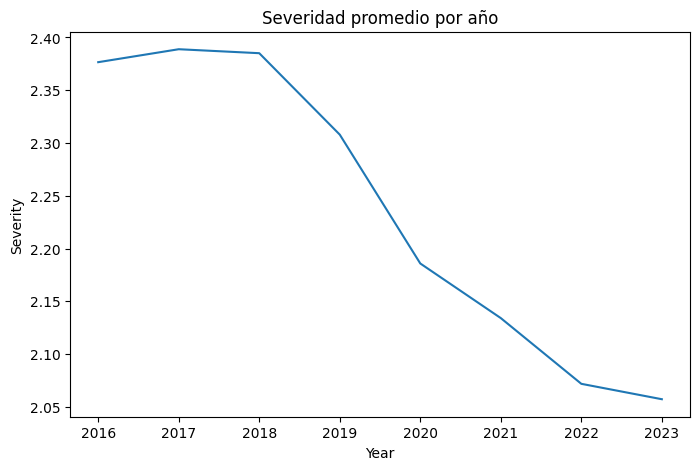

In [16]:
plt.figure(figsize=(8,5))
sns.lineplot(
    data=df,
    x='Year',
    y='Severity',
    estimator='mean',
    errorbar=None
)
plt.title('Severidad promedio por año')
plt.show()


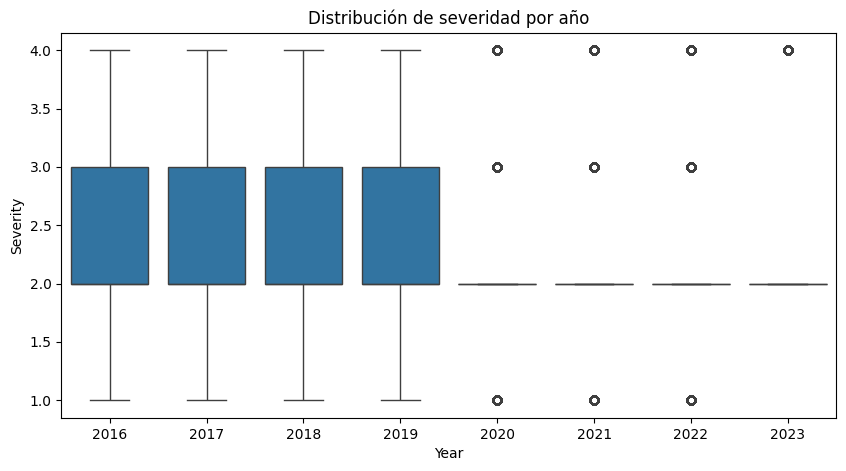

In [17]:
plt.figure(figsize=(10,5))
sns.boxplot(
    data=df,
    x='Year',
    y='Severity'
)
plt.title('Distribución de severidad por año')
plt.show()


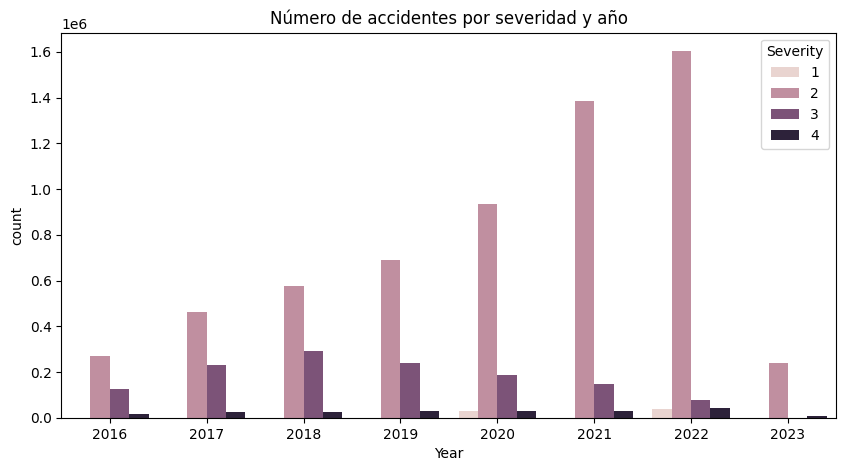

In [18]:
plt.figure(figsize=(10,5))
sns.countplot(
    data=df,
    x='Year',
    hue='Severity'
)
plt.title('Número de accidentes por severidad y año')
plt.show()


In [20]:
df['Hour'] = df['Start_Time'].dt.hour
df['Hour'].value_counts().sort_index()

Hour
0     112378
1      97071
2      93227
3      83863
4     159852
5     228182
6     405837
7     587472
8     577576
9     363034
10    342706
11    355040
12    355001
13    396445
14    448846
15    525855
16    581969
17    576015
18    432042
19    295121
20    225226
21    191452
22    167645
23    126539
Name: count, dtype: int64

In [10]:
df.groupby('Hour')['Severity'].mean()

Hour
0     2.218824
1     2.188872
2     2.205777
3     2.229613
4     2.233929
5     2.219299
6     2.209128
7     2.190159
8     2.191277
9     2.225904
10    2.220119
11    2.214201
12    2.216329
13    2.207444
14    2.199886
15    2.201434
16    2.205477
17    2.210293
18    2.227925
19    2.237106
20    2.247480
21    2.241967
22    2.240580
23    2.203858
Name: Severity, dtype: float64

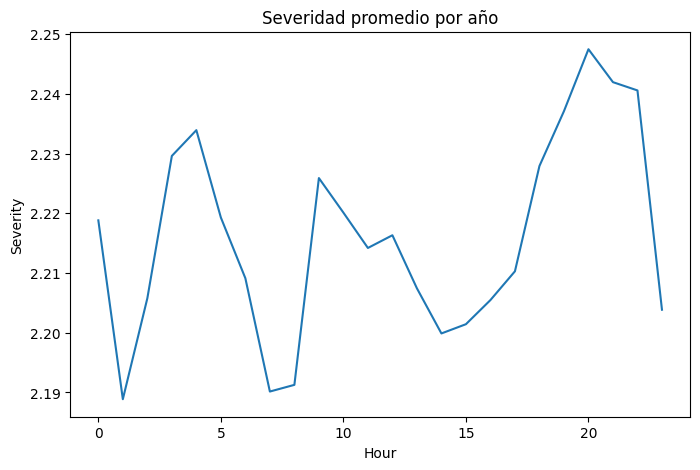

In [21]:
plt.figure(figsize=(8,5))
sns.lineplot(
    data=df,
    x='Hour',
    y='Severity',
    estimator='mean',
    errorbar=None
)
plt.title('Severidad promedio por año')
plt.show()


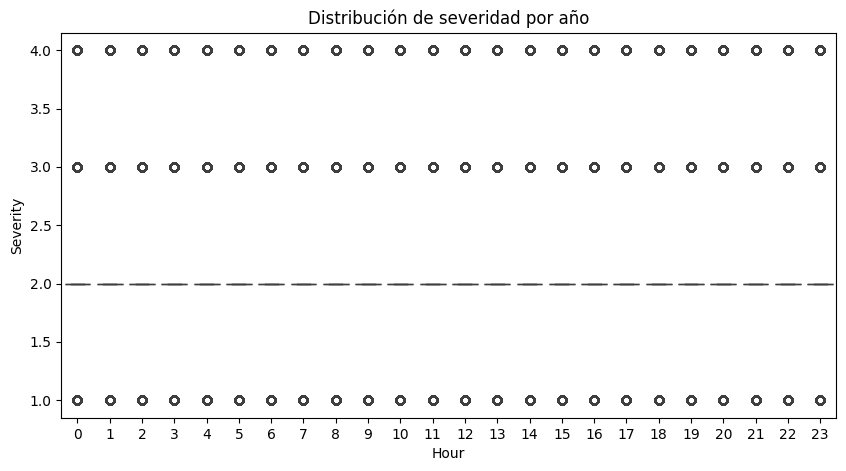

In [22]:
plt.figure(figsize=(10,5))
sns.boxplot(
    data=df,
    x='Hour',
    y='Severity'
)
plt.title('Distribución de severidad por año')
plt.show()


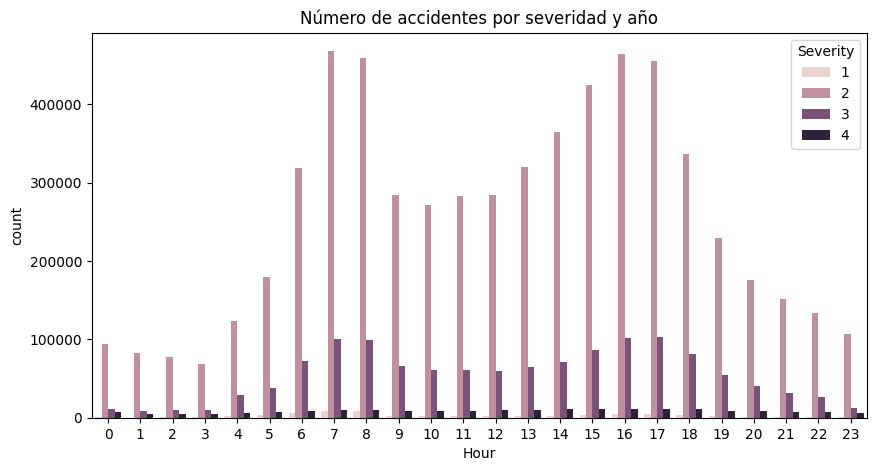

In [24]:
plt.figure(figsize=(10,5))
sns.countplot(
    data=df,
    x='Hour',
    hue='Severity'
)
plt.title('Número de accidentes por severidad y hora')
plt.show()


In [25]:
df['Severity'].value_counts(normalize=True) * 100


Severity
2    79.667017
3    16.812510
4     2.648804
1     0.871669
Name: proportion, dtype: float64

In [26]:
df[['Temperature(F)','Humidity(%)','Visibility(mi)','Wind_Chill(F)']].describe()


,Temperature(F),Humidity(%),Visibility(mi),Wind_Chill(F)
count,7.564541e+06,7.554250e+06,7.551296e+06,5.729375e+06
mean,6.166329e+01,6.483104e+01,9.090376e+00,5.825105e+01
std,1.901365e+01,2.282097e+01,2.688316e+00,2.238983e+01
min,-8.900000e+01,1.000000e+00,0.000000e+00,-8.900000e+01
25%,4.900000e+01,4.800000e+01,1.000000e+01,4.300000e+01
50%,6.400000e+01,6.700000e+01,1.000000e+01,6.200000e+01
75%,7.600000e+01,8.400000e+01,1.000000e+01,7.500000e+01
max,2.070000e+02,1.000000e+02,1.400000e+02,2.070000e+02


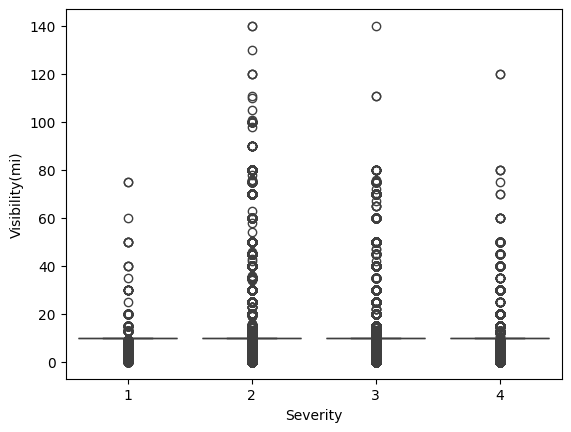

In [27]:
sns.boxplot(data=df, x='Severity', y='Visibility(mi)')
plt.show()


In [28]:
df['State'].value_counts().head(10)


State
CA    1741433
FL     880192
TX     582837
SC     382557
NY     347960
NC     338199
VA     303301
PA     296620
MN     192084
OR     179660
Name: count, dtype: int64

In [29]:
df.groupby('State')['Severity'].mean().sort_values(ascending=False).head(10)


State
GA    2.506931
WI    2.473939
RI    2.458252
KY    2.454176
CO    2.443902
SD    2.442907
VT    2.425486
IA    2.419432
MO    2.399609
IN    2.398072
Name: Severity, dtype: float64

In [37]:
tabla_year_state_sev = (
    df
    .groupby(['Year', 'State', 'Severity'])
    .size()
    .reset_index(name='Accidents')
)
top_states = (
    df['State']
    .value_counts()
    .head(5)
    .index
)

tabla_filtrada = tabla_year_state_sev[
    tabla_year_state_sev['State'].isin(top_states)
]



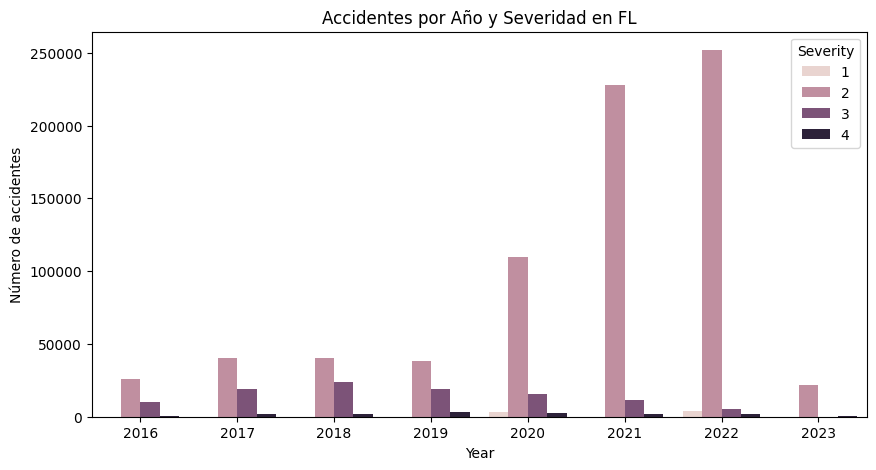

In [41]:
estado = 'FL'

data_estado = tabla_filtrada[tabla_filtrada['State'] == estado]

plt.figure(figsize=(10,5))
sns.barplot(
    data=data_estado,
    x='Year',
    y='Accidents',
    hue='Severity'
)
plt.title(f'Accidentes por Año y Severidad en {estado}')
plt.ylabel('Número de accidentes')
plt.show()


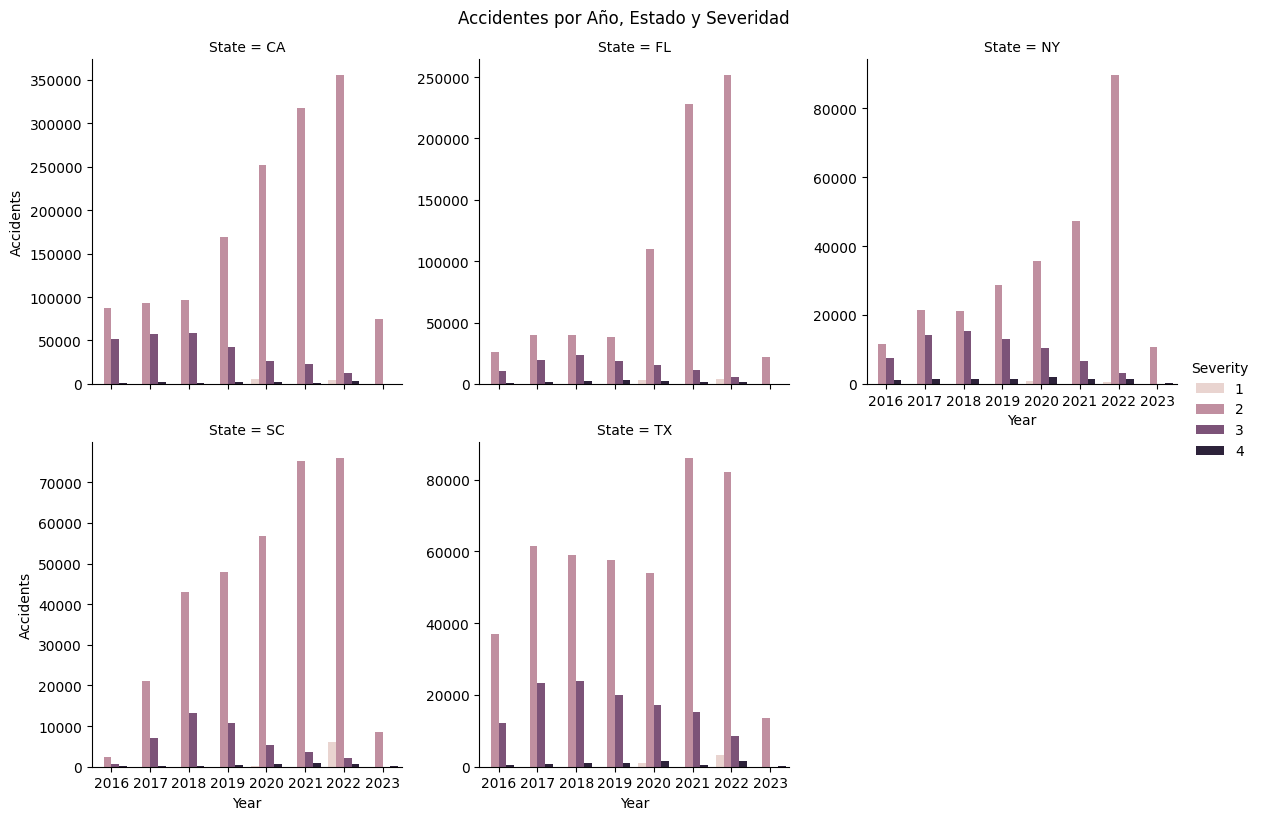

In [42]:
g = sns.catplot(
    data=tabla_filtrada,
    x='Year',
    y='Accidents',
    hue='Severity',
    col='State',
    kind='bar',
    col_wrap=3,
    height=4,
    sharey=False
)

g.fig.suptitle('Accidentes por Año, Estado y Severidad', y=1.02)
plt.show()


In [31]:
df['Duration_min'] = (df['End_Time'] - df['Start_Time']).dt.total_seconds() / 60
df['Duration_min'].describe()


count    7.728394e+06
mean     4.444210e+02
std      1.351229e+04
min      1.216667e+00
25%      3.150000e+01
50%      7.483333e+01
75%      1.251500e+02
max      2.812939e+06
Name: Duration_min, dtype: float64

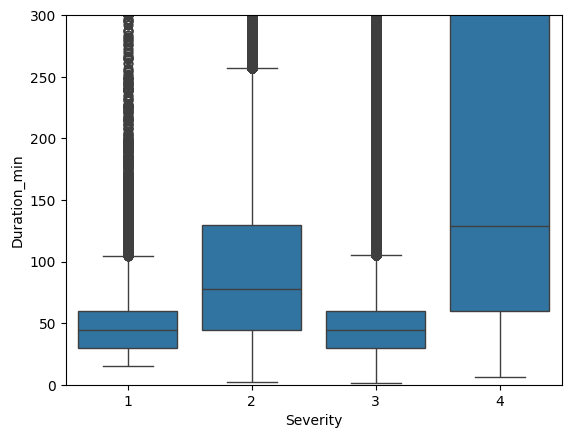

In [32]:
sns.boxplot(data=df, x='Severity', y='Duration_min')
plt.ylim(0,300)
plt.show()


In [33]:
df['Weekday'] = df['Start_Time'].dt.day_name()

df['Weekday'].value_counts()


Weekday
Friday       1366499
Thursday     1316229
Wednesday    1312389
Tuesday      1290929
Monday       1210921
Saturday      668683
Sunday        562744
Name: count, dtype: int64

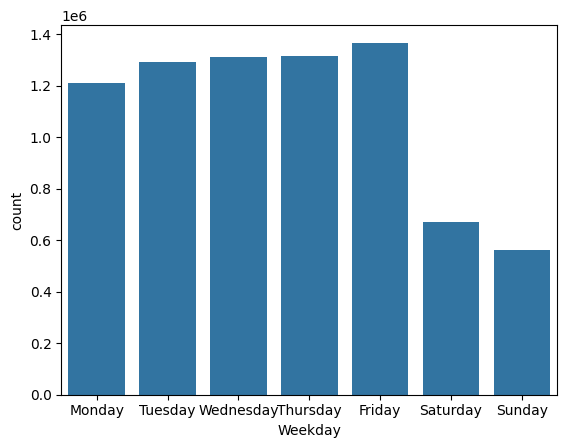

In [34]:
orden = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
sns.countplot(data=df, x='Weekday', order=orden)
plt.show()


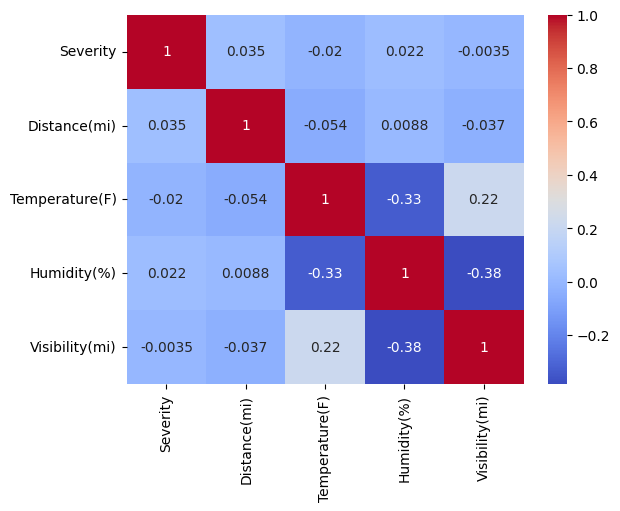

In [35]:
corr = df[['Severity','Distance(mi)','Temperature(F)','Humidity(%)','Visibility(mi)']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


In [43]:
df['Sunrise_Sunset'].value_counts()


Sunrise_Sunset
Day      5334553
Night    2370595
Name: count, dtype: int64

In [44]:
df['Sunrise_Sunset'].value_counts(normalize=True) * 100


Sunrise_Sunset
Day      69.233621
Night    30.766379
Name: proportion, dtype: float64

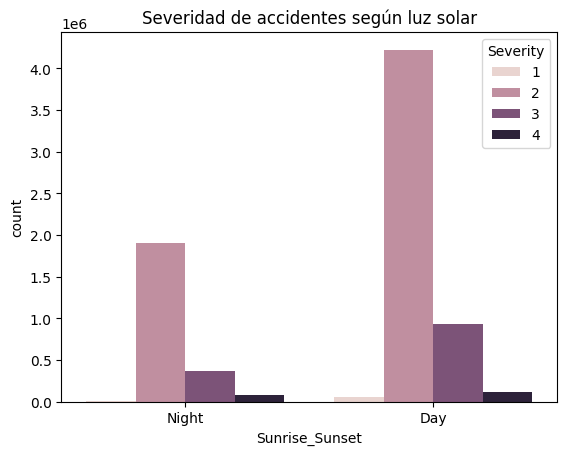

In [45]:
sns.countplot(
    data=df,
    x='Sunrise_Sunset',
    hue='Severity'
)
plt.title('Severidad de accidentes según luz solar')
plt.show()
